In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [79]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

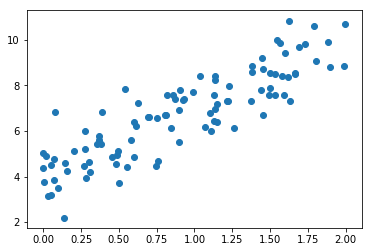

In [80]:
plt.scatter(X, y); plt.show()

In [81]:
X_b = np.c_[ np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [82]:
theta_best

array([[ 4.08076962],
       [ 2.89672604]])

In [83]:
X_new = np.array( [[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

In [84]:
y_predict

array([[ 4.08076962],
       [ 9.87422171]])

TypeError: 'bool' object is not callable

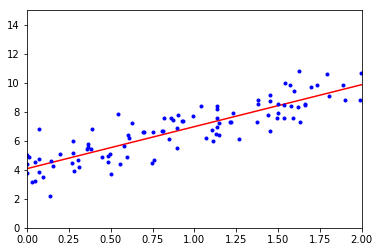

In [85]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
lin_reg.predict(X_new)

In [ ]:
# Gradient Descent

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initializaiton

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

In [ ]:
# Stocastic Gradient Descent

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initilization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor( max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

In [ ]:
# Polynomial Regression

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
plt.scatter(X,y); plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

In [ ]:
X_poly[0]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=1, include_bias = False)),
    ("lin_reg", LinearRegression())
])

In [ ]:
plot_learning_curves(polynomial_regression, X, y)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [ ]:
sgd_reg = SGDRegressor(max_iter = 5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [ ]:
# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])

In [ ]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [86]:
sgd_reg = SGDRegressor(n_iter=1, warm_start = True, penalty=None,
                      learning_rate ="constant", eta0 = 0.0005)

In [ ]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    